In [406]:
from casadi import *
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [407]:
g = SX.sym('g')

In [408]:
Cd = SX.sym('Cd')

In [409]:
Cl = SX.sym('Cl')

In [410]:
vt = SX.sym('vt')

In [411]:
v = SX.sym('v')

In [412]:
theta = SX.sym('theta')

In [413]:
x = SX.sym('x')

In [414]:
y = SX.sym('y')

In [415]:
ode = vertcat(-g*sin(theta)-Cd*g*v**2/(Cl*vt**2), -g*cos(theta)/v + g*v/(vt**2), v*cos(theta), v*sin(theta))

In [416]:
dae = {'x':vertcat(v,theta,x,y),'p':vertcat(g,Cd,Cl,vt),'ode':ode}

In [417]:
opts = {}
opts["fsens_err_con"] = True
opts["quad_err_con"] = True
opts["abstol"] = 1e-6
opts["reltol"] = 1e-6
tend = 15.0
opts["t0"] = 0
opts["tf"] = tend

In [418]:
dt = 0.001
ts = numpy.linspace(0,tend,tend/dt)

In [419]:
opts["grid"] = ts
opts["output_t0"] = True

In [420]:
F = integrator("F","cvodes",dae,opts)

In [421]:
v0 = 6.5; theta0 = -0.1; x0 = 0.0; y0 = 2.0
g = 9.8; Cd = 1.0/5.0; Cl = 1.0; vt = 4.9;

In [422]:
sol = F(x0 = (v0,theta0,x0,y0), p = (g,Cd,Cl,vt))

In [423]:
sol = sol['xf'].full().T

In [424]:
x = sol[:,2]
y = sol[:,3]

In [425]:
# get the index of element of y where altitude becomes negative
idx_negative = numpy.where(y<0.0)[0]

In [426]:
idx_ground = idx_negative[0]

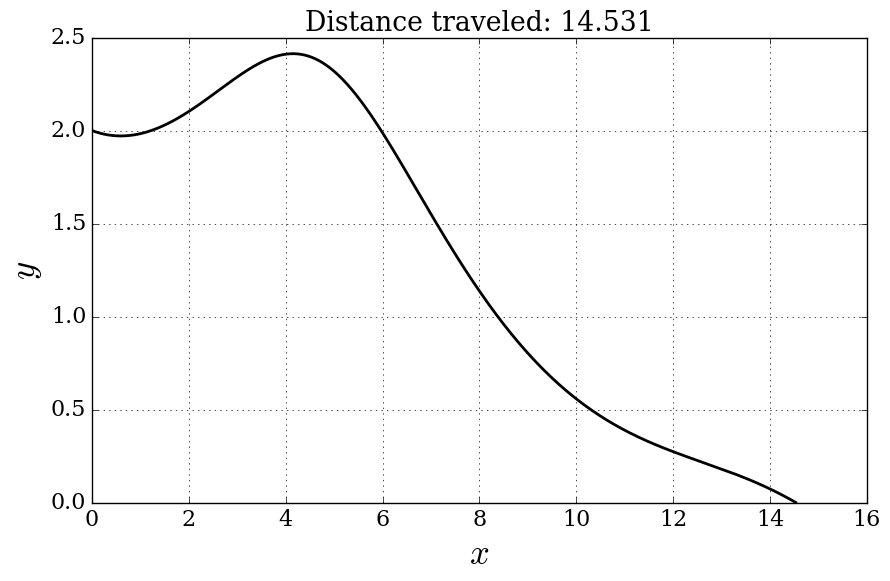

In [427]:
# visualization of the path
pyplot.figure(figsize=(10,6))
pyplot.grid(True)
pyplot.xlabel('$x$',fontsize=25)
pyplot.ylabel('$y$',fontsize=25)
pyplot.title('Distance traveled: {:.3f}'.format(x[idx_ground-1]))
pyplot.plot(x[:idx_ground], y[:idx_ground], 'k-',linewidth=2.0)
